# Mid-Course Project

The project questions and data are from: https://www.udemy.com/course/python-pandas/

Hi There, and thanks for your help. If you're reading this you've been selected to help on a secret initiative.

You will be helping us analyze a portion of data from a company we want to acquire, which could greatly improve the fortunes of Maven Mega Mart.

We'll be working with `project_transactions.csv` and briefly take a look at `product.csv`.

First, read in the transactions data and explore it.

* Take a look at the raw data, the datatypes, and cast `DAY`, `QUANTITY`, `STORE_ID`, and `WEEK_NO` columns to the smallest appropriate datatype. Check the memory reduction by doing so.
* Is there any missing data?
* How many unique households and products are there in the data? The fields household_key and Product_ID will help here.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("../project_data/project_transactions.csv")

In [3]:
df.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0


In [4]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int64  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int64  
 5   SALES_VALUE        float64
 6   STORE_ID           int64  
 7   RETAIL_DISC        float64
 8   WEEK_NO            int64  
 9   COUPON_DISC        float64
 10  COUPON_MATCH_DISC  float64
dtypes: float64(4), int64(7)
memory usage: 180.1 MB


In [5]:
# Use to identify which values can be downcast or put into a cateogory
print(f"Number of rows: {len(df)}\n")
for col in df:
    num_of_unique_values = df[col].nunique()
    category_test = "Could be category" if num_of_unique_values < len(df) else ""
    max_value = f"Data Typ: {df[col].dtype} - Max number: {df[col].max()}"
    print("=" * 15)
    print(col)
    print(f"{'-' * 15}\n")
    print(f"Number of unique values: {df[col].nunique()}")
    print(category_test)
    print(f"{max_value}\n")

Number of rows: 2146311

household_key
---------------

Number of unique values: 2099
Could be category
Data Typ: int64 - Max number: 2099

BASKET_ID
---------------

Number of unique values: 232939
Could be category
Data Typ: int64 - Max number: 42305362535

DAY
---------------

Number of unique values: 711
Could be category
Data Typ: int64 - Max number: 711

PRODUCT_ID
---------------

Number of unique values: 84138
Could be category
Data Typ: int64 - Max number: 18316298

QUANTITY
---------------

Number of unique values: 10593
Could be category
Data Typ: int64 - Max number: 89638

SALES_VALUE
---------------

Number of unique values: 5327
Could be category
Data Typ: float64 - Max number: 840.0

STORE_ID
---------------

Number of unique values: 526
Could be category
Data Typ: int64 - Max number: 34280

RETAIL_DISC
---------------

Number of unique values: 2279
Could be category
Data Typ: float64 - Max number: 3.99

WEEK_NO
---------------

Number of unique values: 102
Could be cate

In [6]:
for col in ["household_key", "STORE_ID"]:
    df[col] = df[col].astype({col: "int16"})

In [7]:
for col in ["DAY", "WEEK_NO"]:
    df[col] = df[col].astype("category")

In [8]:
# check for missing values
df.isna().sum()

household_key        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
dtype: int64

In [9]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Dtype   
---  ------             -----   
 0   household_key      int16   
 1   BASKET_ID          int64   
 2   DAY                category
 3   PRODUCT_ID         int64   
 4   QUANTITY           int64   
 5   SALES_VALUE        float64 
 6   STORE_ID           int16   
 7   RETAIL_DISC        float64 
 8   WEEK_NO            category
 9   COUPON_DISC        float64 
 10  COUPON_MATCH_DISC  float64 
dtypes: category(2), float64(4), int16(2), int64(3)
memory usage: 129.0 MB


## Column Creation

Create two columns:

* A column that captures the `total_discount` by row (sum of `RETAIL_DISC`, `COUPON_DISC`)
* The percentage disount (`total_discount` / `SALES_VALUE`). Make sure this is positive (try `.abs()`).
* If the percentage discount is greater than 1, set it equal to 1. If it is less than 0, set it to 0. 
* Drop the individual discount columns (`RETAIL_DISC`, `COUPON_DISC`, `COUPON_MATCH_DISC`).

Feel free to overwrite the existing transaction DataFrame after making the modifications above.

In [10]:
def percent_cap(x):
    if x > 1:
        return 1
    if x < 0:
        return 0
    return x

In [11]:
df["total_discount"] = df["RETAIL_DISC"] + df["COUPON_DISC"]
df["percent_discount"] = (abs(df["total_discount"]) / df["SALES_VALUE"]).apply(percent_cap)
df["percent_discount"].astype("category")
df

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,total_discount,percent_discount
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0,0.00,0.000000
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0,-0.40,0.133779
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0,0.00,0.000000
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0,-0.99,0.396000
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0,-0.79,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2146306,1598,42305362535,711,92130,1,0.99,3228,0.00,102,0.0,0.0,0.00,0.000000
2146307,1598,42305362535,711,114102,1,8.89,3228,0.00,102,0.0,0.0,0.00,0.000000
2146308,1598,42305362535,711,133449,1,6.99,3228,0.00,102,0.0,0.0,0.00,0.000000
2146309,1598,42305362535,711,6923644,1,4.50,3228,-0.49,102,0.0,0.0,-0.49,0.108889


## Overall Statistics

Calculate:

* The total sales (sum of `SALES_VALUE`), 
* Total discount (sum of `total_discount`)
* Overall percentage discount (sum of total_discount / sum of sales value)
* Total quantity sold (sum of `QUANTITY`).
* Max quantity sold in a single row. Inspect the row as well. Does this have a high discount percentage?
* Total sales value per basket (sum of sales value / nunique basket_id).
* Total sales value per household (sum of sales value / nunique household_key). 

In [12]:
print("Total sales")
df["SALES_VALUE"].sum()

Total sales


6666243.499999999

In [13]:
print("Total discount")
df["total_discount"].sum()

Total discount


-1178658.0799999998

In [14]:
print("Overall percentage discount")
df["total_discount"].sum() / df["SALES_VALUE"].sum()

Overall percentage discount


-0.1768099350106248

In [15]:
"print Avg Discount"
df["percent_discount"].mean()

0.20814156408241888

In [16]:
print("Total quantity sold ")
df["QUANTITY"].sum()

Total quantity sold 


216713611

In [17]:
print("Max quantity sold in a single row")
df["QUANTITY"].max()

Max quantity sold in a single row


89638

In [18]:
df[df["QUANTITY"] == df["QUANTITY"].max()]

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,total_discount,percent_discount
1442095,630,34749153595,503,6534178,89638,250.0,384,-13.45,73,0.0,0.0,-13.45,0.0538


In [19]:
# another way to collect the max quantity by using loc
df.loc[df["QUANTITY"].argmax()].round()

household_key        6.300000e+02
BASKET_ID            3.474915e+10
DAY                  5.030000e+02
PRODUCT_ID           6.534178e+06
QUANTITY             8.963800e+04
SALES_VALUE          2.500000e+02
STORE_ID             3.840000e+02
RETAIL_DISC         -1.300000e+01
WEEK_NO              7.300000e+01
COUPON_DISC          0.000000e+00
COUPON_MATCH_DISC    0.000000e+00
total_discount      -1.300000e+01
percent_discount     0.000000e+00
Name: 1442095, dtype: float64

In [20]:
print("Biggest discount")
df["total_discount"].min()

Biggest discount


-130.02

In [21]:
df[df["total_discount"] == df["total_discount"].min()]

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,total_discount,percent_discount
1823028,1653,40941495193,619,12810391,6,103.67,381,-130.02,89,0.0,0.0,-130.02,1.0


In [22]:
print("Biggest sale item")
df[df["SALES_VALUE"] == df["SALES_VALUE"].max()]

Biggest sale item


,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,total_discount,percent_discount
894515,1609,32006114302,339,12484608,3,840.0,412,0.0,49,0.0,0.0,0.0,0.0


In [23]:
print("Total sales value per basket")
df["SALES_VALUE"].sum() / df["BASKET_ID"].nunique()

Total sales value per basket


28.61797938516092

In [24]:
print("Total sales value per household (sum of sales value / nunique household_key)")
df["SALES_VALUE"].sum() / df["household_key"].nunique()

Total sales value per household (sum of sales value / nunique household_key)


3175.9140066698424

## Household Analysis

* Plot the distribution of total sales value purchased at the household level. 
* What were the top 10 households by quantity purchased?
* What were the top 10 households by sales value?
* Plot the total sales value for our top 10 households by value, ordered from highest to lowest.


Plot the distribution of total sales value purchased at the household level.


<AxesSubplot:ylabel='Frequency'>

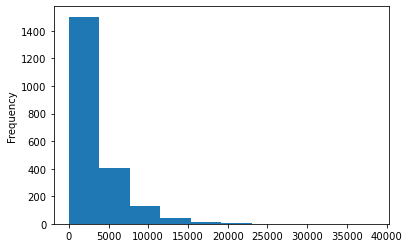

In [25]:
print("Plot the distribution of total sales value purchased at the household level.")
df.groupby("household_key")["SALES_VALUE"].sum().plot(kind = "hist")

In [26]:
print("What were the top 10 households by quantity purchased")
top_10_quantity = df.groupby("household_key")["QUANTITY"].sum().sort_values(ascending = False).iloc[:10]
top_10_quantity

What were the top 10 households by quantity purchased


household_key
1023    4479917
755     3141769
1609    2146715
13      1863829
1430    1741892
1527    1734632
1762    1669880
707     1640193
1029    1496204
1314    1492863
Name: QUANTITY, dtype: int64

In [27]:
print("What were the top 10 households by sales value?")
top_10_sale_value = df.groupby("household_key")["SALES_VALUE"].sum().sort_values(ascending = False).head(10)
top_10_sale_value

What were the top 10 households by sales value?


household_key
1023    38319.79
1609    27859.68
1453    21661.29
1430    20352.99
718     19299.86
707     19194.42
1653    19153.75
1111    18894.72
982     18790.34
400     18494.14
Name: SALES_VALUE, dtype: float64

Plot the total sales value for our top 10 households by value, ordered from highest to lowest


<AxesSubplot:xlabel='household_key'>

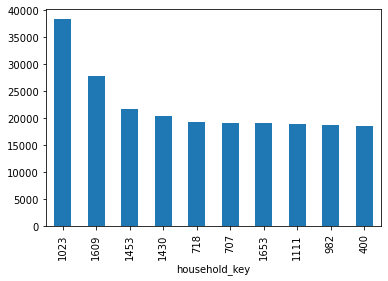

In [28]:
print("Plot the total sales value for our top 10 households by value, ordered from highest to lowest")
df.groupby("household_key")["SALES_VALUE"].sum().sort_values(ascending = False).head(10).plot(kind = "bar")

## Product Analysis

* Which products had the most sales by sales_value? Plot  a horizontal bar chart.
* Did the top 10 selling items have a higher than average discount rate?
* What was the most common `PRODUCT_ID` among rows with the households in our top 10 households by sales value?
* Look up the names of the  top 10 products by sales in the `products.csv` dataset.
* Look up the product name of the item that had the highest quantity sold in a single row.

Which products had the most sales by sales_value? Plot a horizontal bar chart.


<AxesSubplot:ylabel='PRODUCT_ID'>

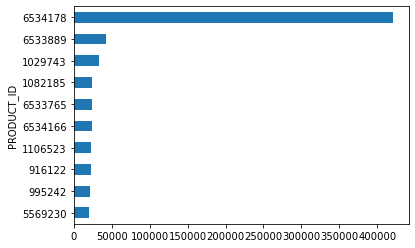

In [29]:
print("Which products had the most sales by sales_value? Plot a horizontal bar chart.")
top10_products = df.groupby("PRODUCT_ID")["SALES_VALUE"].sum().sort_values(ascending = False).head(10).sort_values()
top10_products.plot(kind = "barh")

In [30]:
print("Did the top 10 selling items have a higher than average discount rate?")
top_10_total_discount = df.query("PRODUCT_ID in @top10_products.index").loc[:,"total_discount"].sum()
top_10_total_sales = df.query("PRODUCT_ID in @top10_products.index").loc[:,"SALES_VALUE"].sum()
top_10_total_discount / top_10_total_sales

Did the top 10 selling items have a higher than average discount rate?


-0.10331267387397927

In [31]:
print("What was the most common PRODUCT_ID among rows with the households in our top 10 households by sales value?")

What was the most common PRODUCT_ID among rows with the households in our top 10 households by sales value?


In [32]:
top_10_households = list(df.groupby("household_key")[["SALES_VALUE"]].sum().sort_values(by="SALES_VALUE", ascending = False).iloc[:10].reset_index()["household_key"])

<AxesSubplot:title={'center':'Most common Product ID from top 10 customers'}>

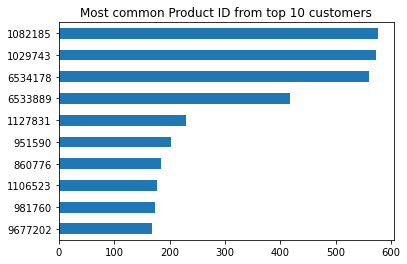

In [38]:
top_10_products_by_top_10_customers = df[df["household_key"].isin(top_10_households)]["PRODUCT_ID"].value_counts().iloc[:10].sort_values()
top_10_products_by_top_10_customers.plot(kind="barh", title = "Most common Product ID from top 10 customers")

In [34]:
print("Look up the names of the top 10 products by sales in the products.csv dataset.")
products = pd.read_csv("../project_data/product.csv")
products.head()

Look up the names of the top 10 products by sales in the products.csv dataset.


,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [35]:
list_of_top_10_products_by_top_10_customers = list(top_10_products_by_top_10_customers.to_frame().index)
products[products["PRODUCT_ID"].isin(list_of_top_10_products_by_top_10_customers)]

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
10630,860776,2,PRODUCE,National,VEGETABLES - ALL OTHERS,CUCUMBERS,36 CT
20973,951590,910,GROCERY,National,BAKED BREAD/BUNS/ROLLS,MAINSTREAM WHITE BREAD,20 OZ
24250,981760,69,GROCERY,Private,EGGS,EGGS - X-LARGE,1 DZ
29657,1029743,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
35576,1082185,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
38262,1106523,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
40600,1127831,5937,PRODUCE,National,BERRIES,STRAWBERRIES,16 OZ
57181,6533889,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
68952,9677202,69,GROCERY,Private,PAPER TOWELS,PAPER TOWELS & HOLDERS,


In [36]:
top_10_df = top_10_products_by_top_10_customers.reset_index(name = "Count sold by top 10 customers").rename({"index": "PRODUCT_ID"}, axis = 1)
products.merge(top_10_df, on="PRODUCT_ID", how='inner').sort_values("Count sold by top 10 customers", ascending = False)

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,Count sold by top 10 customers
4,1082185,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB,576
3,1029743,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA,573
8,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,,561
7,6533889,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,,418
6,1127831,5937,PRODUCE,National,BERRIES,STRAWBERRIES,16 OZ,230
1,951590,910,GROCERY,National,BAKED BREAD/BUNS/ROLLS,MAINSTREAM WHITE BREAD,20 OZ,202
0,860776,2,PRODUCE,National,VEGETABLES - ALL OTHERS,CUCUMBERS,36 CT,184
5,1106523,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA,178
2,981760,69,GROCERY,Private,EGGS,EGGS - X-LARGE,1 DZ,174
9,9677202,69,GROCERY,Private,PAPER TOWELS,PAPER TOWELS & HOLDERS,,168


In [37]:
print("Look up the product name of the item that had the highest quantity sold in a single row.")

products[products["PRODUCT_ID"] == df[df["QUANTITY"] == df["QUANTITY"].max()]["PRODUCT_ID"].max()]

Look up the product name of the item that had the highest quantity sold in a single row.


,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
